# Kolokvijum II

Sa slika datih u dostavljenom skupu podataka izdvojiti sve cifre uokvirene pravougaonicima i sumirati njihove vrednosti. Ispisati rezultat sume. Obrazložiti odabranu metodologiju. Izračunati tačnost algoritma i prokomentarisati greške.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import struct
%matplotlib widget

import torch

from torch import nn
import torch.nn.functional as F

from torch import optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [2]:
class MnistDataset(Dataset):
    def __init__(self, path):
        super().__init__()
        
        self.digits = self.load_digits(f"{path}-images.idx3-ubyte")
        self.ditig_labels = self.load_digit_labels(f"{path}-labels.idx1-ubyte")
        
        self.data = self.load_images()
    
    def load_digits(self, path):
        with open(path, "rb") as fp:
            struct.unpack(">I", fp.read(4))
            number_of_images = struct.unpack(">I", fp.read(4))[0]
            rows = struct.unpack(">I", fp.read(4))[0]
            cols = struct.unpack(">I", fp.read(4))[0]
            digits = np.frombuffer(fp.read(number_of_images*rows*cols), dtype=np.uint8).reshape((number_of_images, 1, rows, cols))
            digits = digits.astype(np.float32)/255
            return digits
    
    def load_digit_labels(self, path):
        with open(path, "rb") as fp:
            struct.unpack(">I", fp.read(4))
            number_of_labels = struct.unpack(">I", fp.read(4))[0]
            ditig_labels = np.frombuffer(fp.read(number_of_labels), dtype=np.uint8)
            return ditig_labels
        
    def load_images(self):
        slike = []
        labele = []
        w = 150
        h = 150
        for _ in range(10000):
            velika_slika = np.zeros((1, w, h), dtype=np.float32)
            labela = -1*np.ones((1, w, h), dtype=np.float32)
            cifre = np.random.choice(len(self.digits), 2)
            koordinate = np.random.randint(0, w-28, size=(2, 2))
            pravougaonik_a = np.random.randint(5, w-40, size=2)
            pravougaonik_b = np.array([np.random.randint(pravougaonik_a[0]+29, w), np.random.randint(pravougaonik_a[1]+29, w)])
            p = np.ones(pravougaonik_b-pravougaonik_a, dtype=np.float32)
            p[1:(pravougaonik_b-pravougaonik_a)[0]-1, 1:(pravougaonik_b-pravougaonik_a)[1]-1] = np.zeros(pravougaonik_b-pravougaonik_a-2)
            
            for i, c in enumerate(cifre):
                velika_slika[0][koordinate[i][0]+1:koordinate[i][0]+27, koordinate[i][1]+1:koordinate[i][1]+27] = self.digits[c][0][1:27,1:27]
                labela[0][koordinate[i][0]:koordinate[i][0]+28, koordinate[i][1]:koordinate[i][1]+28] = 1
            
            velika_slika[0][pravougaonik_a[0]:pravougaonik_b[0], pravougaonik_a[1]:pravougaonik_b[1]] = np.maximum(p, velika_slika[0][pravougaonik_a[0]:pravougaonik_b[0], pravougaonik_a[1]:pravougaonik_b[1]])

            slike.append(velika_slika)
            labele.append(labela)
        return list(zip(slike, labele))
    
    def __getitem__(self, index):
        return self.data[index]
    
    def __len__(self):
        return len(self.data)

In [3]:
mnist_train = MnistDataset("train")
mnist_train_ds = DataLoader(mnist_train, batch_size=32, shuffle=True)

mnist_test = MnistDataset("t10k")
mnist_test_ds = DataLoader(mnist_test, batch_size=5, shuffle=True)

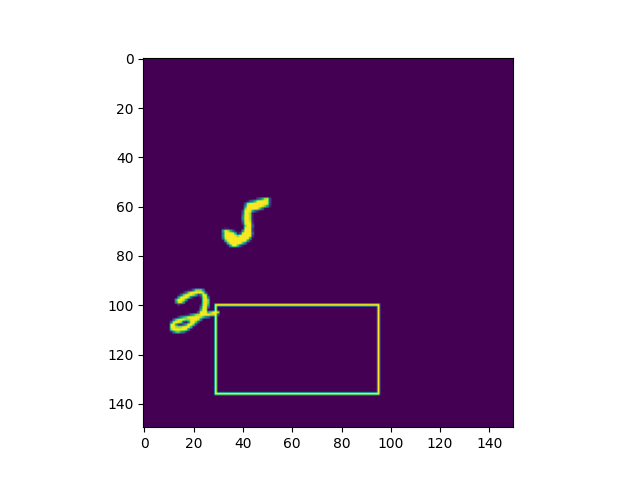

In [4]:
data = next(iter(mnist_train_ds))

plt.figure()    
plt.imshow(data[0][0][0])
plt.show()